In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from scipy import stats

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull
from pyspark.sql.types import DoubleType, IntegerType

In [3]:
spark = SparkSession.builder.master("yarn").config('spark.executor.instances','30').appName("hope10").getOrCreate()

In [4]:
df_tb2 = spark.read.csv("/user/spark/share/output/table2_eda",header=True)

In [ ]:
## 查看第一筆資料內容 方式1
df_tb2.take(1)

In [ ]:
## 查看第一筆資料內容 方式2
df_tb2.show(1)

In [ ]:
df_tb2.count()

In [5]:
df_tb2.printSchema()

root
 |-- user: string (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- adgroup_id: string (nullable = true)
 |-- pid: string (nullable = true)
 |-- clk: string (nullable = true)
 |-- cate_id: string (nullable = true)
 |-- campaign_id: string (nullable = true)
 |-- customer: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: string (nullable = true)
 |-- cms_segid: string (nullable = true)
 |-- cms_group_id: string (nullable = true)
 |-- final_gender_code: string (nullable = true)
 |-- age_level: string (nullable = true)
 |-- pvalue_level: string (nullable = true)
 |-- shopping_level: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- new_user_class_level: string (nullable = true)
 |-- user_cate: string (nullable = true)
 |-- pv_1: string (nullable = true)
 |-- cart_1: string (nullable = true)
 |-- fav_1: string (nullable = true)
 |-- buy_1: string (nullable = true)
 |-- pv_2: string (nullable = true)
 |-- cart_2: string (null

In [ ]:
null_cnt = []
for col in df_tb2.columns:
    isnull_c = df_tb2.filter(isnull(col)).count()
    NULL_c = df_tb2.filter(df_tb2[col]=='NULL').count()
    null_cnt.append(isnull_c+NULL_c)
    print(isnull_c,"&",NULL_c," ----> ",col)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot( df_tb2.columns, null_cnt, palette="PuBuGn") 
plt.title('Number of Missing Value')
plt.ylabel('count')
plt.xlabel('column')
plt.xticks(rotation=90);

Colormap  is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

## 重複值

### 以 age_level 欄位為例

In [6]:
dist_age_level = df_tb2.select('age_level').groupby('age_level').count().sort('age_level', ascending=True)

In [7]:
dist_age_level.show()

+---------+-------+
|age_level|  count|
+---------+-------+
|     null|1528526|
|        0|   9189|
|        1|1379703|
|        2|4567837|
|        3|7573614|
|        4|6406045|
|        5|4652618|
|        6| 440429|
+---------+-------+



In [8]:
dist_age_level = dist_age_level.toPandas()

In [9]:
dist_age_level_x = dist_age_level['age_level'].tolist()
dist_age_level_y = dist_age_level['count'].tolist()

In [10]:
print(dist_age_level_x)
print(dist_age_level_y)

[None, '0', '1', '2', '3', '4', '5', '6']
[1528526, 9189, 1379703, 4567837, 7573614, 6406045, 4652618, 440429]


Text(0.5, 0, 'User')

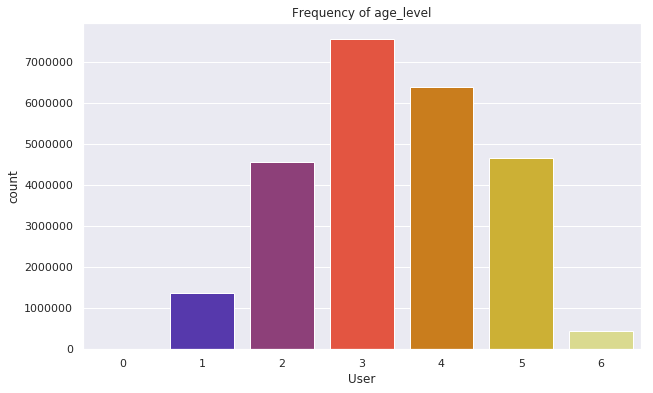

In [11]:
plt.figure(figsize=(10,6))
sns.barplot( dist_age_level_x, dist_age_level_y, palette="CMRmap") 
plt.title('Frequency of age_level')
plt.ylabel('count')
plt.xlabel('User')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(dist_age_level_x,dist_age_level_y, s = 100) 
plt.title('Frequency of User')
plt.ylabel('count')
plt.xlabel('User')

### output frequency to csv

In [ ]:
# for col in df_tb2.columns:
#     PATH = 'output/eda/distinct_cnt/'+col+'.csv'
#     df_tb2.select(col).groupby(col).count().sort(col, ascending=True).toPandas().to_csv(PATH,index = False)

In [ ]:
# df_tb2.select('user').groupby('user').count().sort('user', ascending=True).toPandas().to_csv('output/eda/distinct_count/user.csv',index = False)
# df_tb2.select('time_stamp').groupby('time_stamp').count().sort('time_stamp', ascending=True).toPandas().to_csv('output/eda/distinct_count/time_stamp.csv',index = False)
# df_tb2.select('adgroup_id').groupby('adgroup_id').count().sort('adgroup_id', ascending=True).toPandas().to_csv('output/eda/distinct_count/adgroup_id.csv',index = False)
# df_tb2.select('pid').groupby('pid').count().sort('pid', ascending=True).toPandas().to_csv('output/eda/distinct_count/pid.csv',index = False)
# .......

### not using

In [ ]:
tb2_describe = df_tb2.describe()

In [ ]:
df_tb2.describe()

In [ ]:
pd_tb2_describe = tb2_describe.toPandas()

In [ ]:
pd_tb2_describe

In [ ]:
pd_tb2_describe.iloc[:,-10:-1]

In [ ]:
pd_tb2_describe.iloc[:,10]